In [288]:
#load df
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import sys
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('full_set.csv')

In [289]:
df.head()

,ID,mean_L,mean_R,std_L,std_R,skew_L,skew_R,kurtosis_L,kurtosis_R,mean_hold_diff,...,skew_LR,skew_RL,skew_RR,kurtosis_LL,kurtosis_LR,kurtosis_RL,kurtosis_RR,mean_LR_RL_diff,mean_LL_RR_diff,Parkinsons
0,0EA27ICBLF,77.749454,79.306669,17.598336,24.609195,1.585104,4.130272,11.521208,44.939249,-1.557215,...,0.884186,-1.188579,0.148528,-0.700351,-0.290392,2.160455,-1.237978,-139.245790,-10.284312,False
1,0EA27ICBLF,77.749454,79.306669,17.598336,24.609195,1.585104,4.130272,11.521208,44.939249,-1.557215,...,0.884186,-1.188579,0.148528,-0.700351,-0.290392,2.160455,-1.237978,-139.245790,-10.284312,True
2,2JTCBKUP8T,89.355483,90.890535,22.041569,34.355843,0.795678,0.507986,7.205031,2.213135,-1.535052,...,0.220483,0.605639,0.476038,1.246125,-0.675195,-0.876806,-0.016502,39.519115,-21.948033,True
3,2JTCBKUP8T,89.355483,90.890535,22.041569,34.355843,0.795678,0.507986,7.205031,2.213135,-1.535052,...,0.220483,0.605639,0.476038,1.246125,-0.675195,-0.876806,-0.016502,39.519115,-21.948033,False
4,310NXPGJPD,153.521655,149.722970,43.931450,37.167793,1.351041,1.150740,2.606522,1.740574,3.798685,...,-0.854579,-0.050837,0.139720,-1.015394,-0.438153,-0.423111,-1.052716,30.863529,0.345793,True


In [290]:
#check duplicates
df.duplicated().sum()

33

In [291]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229 entries, 0 to 261
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               229 non-null    object 
 1   mean_L           229 non-null    float64
 2   mean_R           229 non-null    float64
 3   std_L            229 non-null    float64
 4   std_R            229 non-null    float64
 5   skew_L           229 non-null    float64
 6   skew_R           229 non-null    float64
 7   kurtosis_L       229 non-null    float64
 8   kurtosis_R       229 non-null    float64
 9   mean_hold_diff   229 non-null    float64
 10  mean_LL          229 non-null    float64
 11  mean_LR          229 non-null    float64
 12  mean_RL          229 non-null    float64
 13  mean_RR          229 non-null    float64
 14  std_LL           229 non-null    float64
 15  std_LR           229 non-null    float64
 16  std_RL           229 non-null    float64
 17  std_RR           229 

In [293]:
df.describe()

,mean_L,mean_R,std_L,std_R,skew_L,skew_R,kurtosis_L,kurtosis_R,mean_hold_diff,mean_LL,...,skew_LL,skew_LR,skew_RL,skew_RR,kurtosis_LL,kurtosis_LR,kurtosis_RL,kurtosis_RR,mean_LR_RL_diff,mean_LL_RR_diff
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,...,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000
mean,121.057529,113.034245,46.646709,39.214617,0.654317,0.829466,6.653246,11.917750,8.023284,306.225617,...,0.697854,0.776105,0.773042,0.695839,1.152910,1.223318,1.610661,1.480029,-1.152416,-5.865838
std,33.966072,29.255669,23.881651,17.334970,1.195439,1.537212,18.930210,38.595455,15.879145,90.249001,...,0.741956,0.951014,1.033358,0.864216,2.377050,2.670876,2.896822,3.012989,38.298518,27.605933
min,54.783234,56.623482,12.991950,10.060590,-0.904835,-0.974446,-0.946774,-0.844639,-34.144906,156.842356,...,-1.796139,-1.601625,-1.626945,-1.427744,-1.100806,-1.279571,-1.213554,-1.284792,-139.245790,-72.749965
25%,97.461568,94.695520,29.744475,25.728079,-0.050905,0.054386,0.637910,1.330655,-1.328457,239.773541,...,0.250765,0.146400,0.066801,0.092334,-0.418570,-0.552290,-0.505954,-0.352682,-18.402792,-24.794478
50%,115.143580,110.567627,43.931450,36.921484,0.452101,0.500637,1.738864,2.329706,7.014124,287.505411,...,0.560629,0.711066,0.760927,0.553538,0.158326,0.266234,0.584057,0.306093,4.287410,-5.515228
75%,142.921354,131.127390,59.294660,51.277343,0.941623,1.083999,6.336785,5.463960,13.080089,356.548322,...,1.200417,1.511924,1.488224,1.269504,2.024448,2.267436,2.865820,2.033884,19.221302,13.676211
max,210.240965,193.754322,172.192686,89.618690,7.105648,9.044679,152.937539,345.668611,104.368191,608.626149,...,2.899106,3.126761,2.895019,2.952814,12.424081,14.456914,12.590434,16.893841,98.944905,73.440794


In [294]:
df['Parkinsons'].value_counts()

Parkinsons
False    131
True      98
Name: count, dtype: int64

In [295]:
#convert 'Parkinsons' to binary from True or False
df['Parkinsons'] = df['Parkinsons'].astype(int)
df['Parkinsons'].value_counts()

Parkinsons
0    131
1     98
Name: count, dtype: int64

In [296]:
#drop column id
df.drop(columns=['ID'], inplace=True)

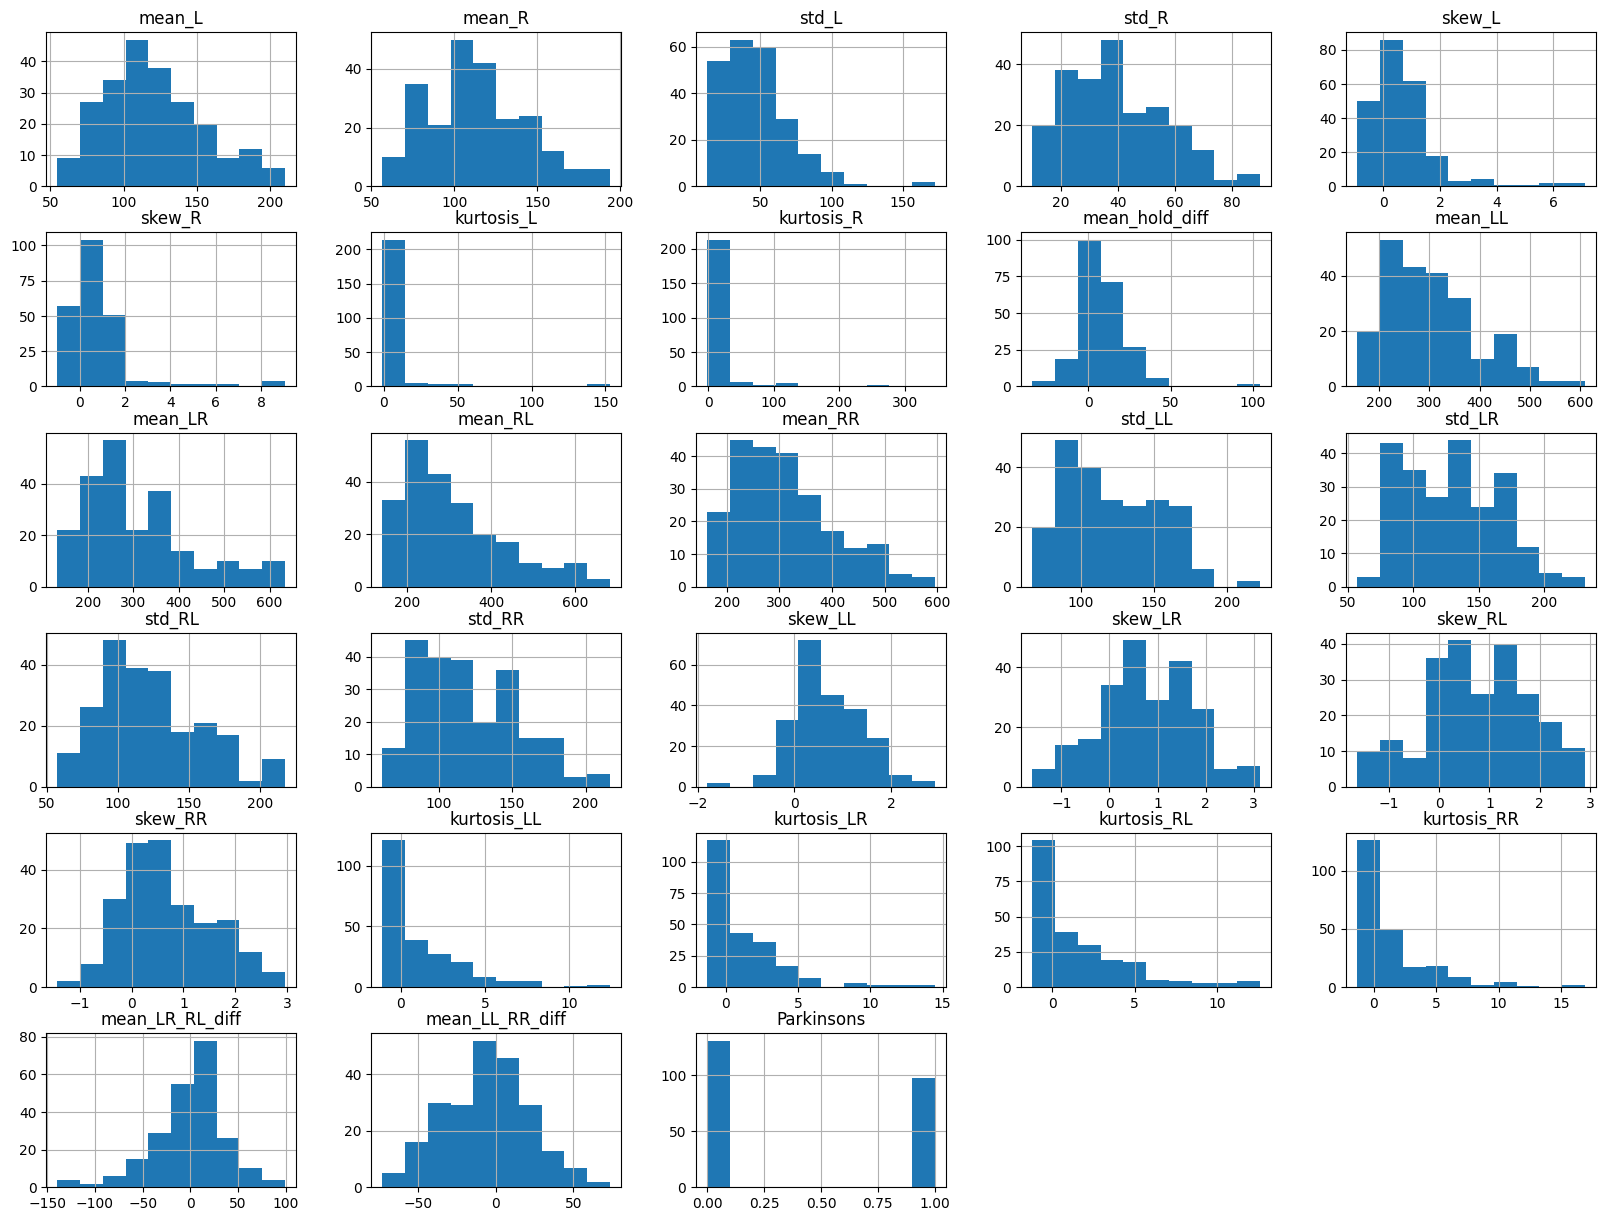

In [297]:
df.hist(figsize=(20,15));

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(y_train.value_counts())
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Parkinsons
0    105
1     78
Name: count, dtype: int64
(183, 27)
(183,)
(46, 27)
(46,)


In [299]:
# Import GaussianNB
from sklearn.naive_bayes import GaussianNB
# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=4),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel="linear", random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "Stochastic Gradient Descent": SGDClassifier(loss="hinge", random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
}

# Store results in a list
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    results.append([name, round(train_score, 4), round(test_score, 4)])

# Convert results to DataFrame and print
df_results = pd.DataFrame(results, columns=["Model", "Train Accuracy", "Test Accuracy"])
df_results.sort_values(by="Test Accuracy", ascending=False, inplace=True)
df_results.reset_index(drop=True, inplace=True)
print(df_results)

                         Model  Train Accuracy  Test Accuracy
0  Stochastic Gradient Descent          0.5792         0.5435
1          Logistic Regression          0.5956         0.4348
2       Support Vector Machine          0.6175         0.3696
3          K-Nearest Neighbors          0.6011         0.3261
4         Gaussian Naive Bayes          0.5410         0.3261
5                Decision Tree          0.6120         0.2391
6                Random Forest          0.6612         0.2174
7            Gradient Boosting          0.6612         0.1957
8                      XGBoost          0.6612         0.1957


In [304]:
#train a basic sgd classifier model
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sgd = SGDClassifier(loss='hinge', random_state=42)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
y_pred_train = sgd.predict(X_train)

print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

Train Accuracy:  0.5737704918032787
Test Accuracy:  0.5652173913043478


In [307]:
# Check importance of features
importances = sgd.coef_[0]
feature_names = X.columns
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(len(importances)):  # Ensure the loop iterates only up to the size of importances
    print(f"{f + 1}. feature {feature_names[indices[f]]} ({importances[indices[f]]})")

Feature ranking:
1. feature mean_L (545.404136175677)
2. feature mean_hold_diff (389.2959990689977)
3. feature kurtosis_L (129.1431390688044)
4. feature std_L (-100.16175626475614)
5. feature skew_LR (-207.06823784311104)
6. feature mean_LR (-230.2264303905211)
7. feature std_LL (-246.25365822571104)
8. feature std_R (-252.29340086105825)
9. feature mean_RL (-254.53226390615814)
10. feature mean_RR (-273.2777953413765)
11. feature skew_R (-273.60769547084817)
12. feature std_RL (-290.53393394185)
13. feature skew_LL (-376.0972542400604)
14. feature mean_R (-429.85262621735495)
15. feature std_LR (-523.6363496715738)
16. feature mean_LL (-592.9010431633606)
17. feature skew_L (-631.8376265072025)
18. feature kurtosis_R (-671.8921690146549)
19. feature std_RR (-691.8184783590026)


In [302]:
#drop last 8 features
X_train = X_train.drop(columns=[feature_names[indices[i]] for i in range(8)])
X_test = X_test.drop(columns=[feature_names[indices[i]] for i in range(8)])

In [ ]:
#save the model using pickle
import pickle
filename = '../data/sgd_model.pkl'
pickle.dump(sgd, open(filename, 'wb'))